In [1]:
import pandas as pd

In [2]:
import networkx
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

def read_graph(filename) -> networkx.Graph:
    """
    Reads a graph from a file.
    """
    tree = ET.parse(filename)
    print(tree)
    root = tree.getroot()
    nodes = set()
    G = networkx.DiGraph()
    for child in root.iter("vertex"):
        node = child.attrib["id"]
        if node not in nodes:
            nodes.add(node)
            G.add_node(node)
        for adj in child.iter("adjacent"):
            adjacent_node = adj.attrib["vertex"]
            if adjacent_node not in nodes:
                nodes.add(adjacent_node)
                G.add_node(adjacent_node)
            G.add_edge(node, adjacent_node)
    return G


In [3]:
full_data = pd.read_csv("../data/loadtest.csv", index_col=0)

In [4]:
data_without_time = full_data.drop("Time", axis=1)

In [5]:
import matplotlib.pyplot as plt

In [6]:
c = data_without_time.corr()
c

,carts,carts-db,catalogue,catalogue-db,front-end,orders,orders-db,payment,queue-master,rabbitmq,session-db,shipping,user,user-db
carts,1.000000,0.093949,0.047956,-0.004693,0.018113,0.279215,0.175189,0.101570,0.092751,0.468533,0.176521,0.501869,-0.006405,0.101226
carts-db,0.093949,1.000000,0.707466,0.037180,0.115841,-0.006966,0.770503,0.678023,0.091769,0.240431,0.712814,0.076400,0.767246,0.868683
catalogue,0.047956,0.707466,1.000000,-0.069118,0.065112,0.027246,0.698252,0.664541,0.036380,0.175879,0.561021,0.036463,0.719466,0.757496
catalogue-db,-0.004693,0.037180,-0.069118,1.000000,0.001245,0.250051,0.037745,-0.006126,0.014767,0.013483,0.029791,0.222430,0.058135,0.044823
front-end,0.018113,0.115841,0.065112,0.001245,1.000000,0.006276,0.117600,0.050546,0.410166,0.015127,0.057135,0.008661,0.083846,0.087244
orders,0.279215,-0.006966,0.027246,0.250051,0.006276,1.000000,-0.000788,0.031738,0.257541,0.097226,0.039275,0.720947,-0.001703,-0.008189
orders-db,0.175189,0.770503,0.698252,0.037745,0.117600,-0.000788,1.000000,0.595503,0.075732,0.234519,0.616906,0.068617,0.693297,0.852712
payment,0.101570,0.678023,0.664541,-0.006126,0.050546,0.031738,0.595503,1.000000,0.040365,0.218579,0.527246,0.053669,0.669421,0.686250
queue-master,0.092751,0.091769,0.036380,0.014767,0.410166,0.257541,0.075732,0.040365,1.000000,0.058996,0.034527,0.155879,0.015442,0.065090
rabbitmq,0.468533,0.240431,0.175879,0.013483,0.015127,0.097226,0.234519,0.218579,0.058996,1.000000,0.184294,0.530326,0.241663,0.235054


In [7]:
import numpy as np

<Figure size 1440x1440 with 0 Axes>

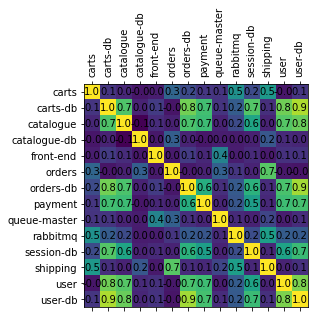

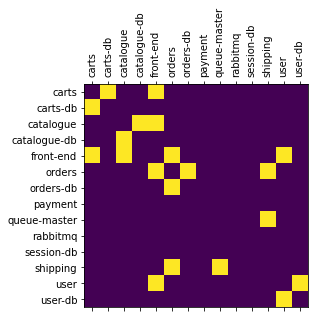

In [8]:
plt.figure(figsize=(20, 20))
plt.matshow(c)
plt.xticks(range(len(c.columns)), c.columns.to_list(), rotation=90)
plt.yticks(range(len(c.index)), c.index.to_list())
for (i, j), z in np.ndenumerate(c):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()
graph = read_graph("../data/Sock-shop-xml.txt")
graph = graph.to_undirected()

plt.matshow(networkx.to_numpy_array(graph, c.columns.to_list()))
plt.xticks(range(len(c.columns)), c.columns.to_list(), rotation=90)
plt.yticks(range(len(c.index)), c.index.to_list())
plt.show()

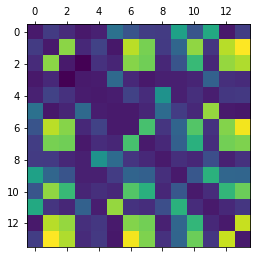

In [9]:
d = c.to_numpy()
np.fill_diagonal(d, 0)
plt.matshow(d)
correlation_graph = networkx.from_numpy_array(d, create_using=networkx.Graph)
for edge in correlation_graph.edges():
    correlation_graph.remove_edge(*edge)
    correlation_graph.add_edge(edge[0], edge[1], weight=d[edge[0], edge[1]])

/var/folders/ft/nrl43w791nv5zxyttws04wsc0000gn/T/ipykernel_56273/1095050718.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


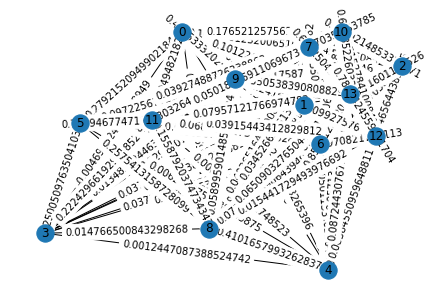

In [10]:
networkx.draw(correlation_graph, networkx.spring_layout(correlation_graph, seed=7), with_labels=True)
edge_labels = networkx.get_edge_attributes(correlation_graph, "weight")
networkx.draw_networkx_edge_labels(correlation_graph, networkx.spring_layout(correlation_graph, seed=7), edge_labels)
plt.tight_layout()

In [11]:
edge_labels

{(0, 1): 0.09394929237548828,
 (0, 2): 0.04795602188336214,
 (0, 3): -0.004692524098668949,
 (0, 4): 0.018112604765092976,
 (0, 5): 0.27921520949902184,
 (0, 6): 0.17518902087721905,
 (0, 7): 0.10157012320065102,
 (0, 8): 0.09275138669527176,
 (0, 9): 0.46853332029008365,
 (0, 10): 0.1765212575621616,
 (0, 11): 0.5018694948218203,
 (0, 12): -0.006405359663097405,
 (0, 13): 0.10122628137448934,
 (1, 2): 0.7074660061868441,
 (1, 3): 0.037179608896989715,
 (1, 4): 0.11584084129138811,
 (1, 5): -0.00696632065810247,
 (1, 6): 0.7705030297835445,
 (1, 7): 0.6780234009613362,
 (1, 8): 0.09176897379157271,
 (1, 9): 0.2404306226500367,
 (1, 10): 0.7128137390747106,
 (1, 11): 0.07639964534992875,
 (1, 12): 0.7672458867290525,
 (1, 13): 0.868682614851045,
 (2, 3): -0.06911765732718782,
 (2, 4): 0.0651121301784667,
 (2, 5): 0.02724634708607857,
 (2, 6): 0.6982520177030896,
 (2, 7): 0.6645405508920462,
 (2, 8): 0.036379932096572455,
 (2, 9): 0.1758790524365746,
 (2, 10): 0.5610214853326371,
 (2, 11

In [12]:
correlation_graph.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (9, 10), (9, 11), (9, 12), (9, 13), (10, 11), (10, 12), (10, 13), (11, 12), (11, 13), (12, 13)])

In [13]:

num_graphs = 10000
c = data_without_time.corr()
d = c.to_numpy()
np.fill_diagonal(d, 0)
graphs = []
correlation_graph = networkx.from_numpy_array(d, create_using=networkx.Graph)
for edge in correlation_graph.edges():
    correlation_graph.remove_edge(*edge)
    correlation_graph.add_edge(edge[0], edge[1], weight=d[edge[0], edge[1]])
correlation_graph: networkx.Graph = correlation_graph
for i in range(num_graphs):
    new_graph = networkx.DiGraph()
    initial_node = list(correlation_graph.nodes)[np.random.randint(0, len(correlation_graph.nodes))]
    new_graph.add_node(initial_node)
    previous_random_neighbors = [initial_node]
    edge_labels = networkx.get_edge_attributes(correlation_graph, "weight")
    reverse_edge_labels = {(key[1], key[0]): value for key, value in edge_labels.items()}
    edge_labels = {**edge_labels, **reverse_edge_labels}
    while len(previous_random_neighbors):
        new_random_neighbors = []
        for node in previous_random_neighbors:
            # Get random edge from node to another node in the graph using weight as probability
            genrated_propagation = [edge[1] for edge in correlation_graph.edges(node) if edge_labels[edge] > np.random.random() and edge[1] not in new_graph.nodes]
            new_random_neighbors += genrated_propagation
            for neighbor in genrated_propagation:
                new_graph.add_edge(node, neighbor)
        previous_random_neighbors = new_random_neighbors
        np.random.shuffle(previous_random_neighbors)
    graphs.append(new_graph)

In [14]:
correlation_graph.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13))

In [15]:
10000 * 14 * 14 * 1

1960000

In [16]:
# 1960000 bits in MB
1960000 / 8 / 1024

239.2578125

In [17]:
# Define magic numbers
from typing import List
def encode_graphs(graphs: List[networkx.Graph]) -> np.ndarray:
    """
    Encodes a list of graphs into a array.
    """
    graph_seperator = 255
    numbers = []
    for graph in graphs:
        for edge in graph.edges():
            numbers.append(edge[0])
            numbers.append(edge[1])
        numbers.append(graph_seperator)
    return np.array(numbers, dtype=np.uint8)

def decode_graphs(encoded_graphs: np.ndarray) -> List[networkx.Graph]:
    """
    Decodes a list of graphs from a array.
    """
    graph_seperator = 255
    graphs = []
    current_graph = networkx.DiGraph()
    last_number = None
    for number in encoded_graphs:
        if number == graph_seperator:
            if last_number is not None:
                raise ValueError("Invalid encoded graph")
            graphs.append(current_graph)
            current_graph = networkx.DiGraph()
        else:
            if last_number is not None:
                current_graph.add_edge(last_number, number)
                last_number = None
                continue
            last_number = number
    return graphs


In [18]:
encode_graphs(graphs[0:1])

array([  5,  11, 255], dtype=uint8)

In [19]:
encode_graphs(decode_graphs(encode_graphs(graphs[0:1])))

array([  5,  11, 255], dtype=uint8)

In [20]:
np.save('graphs.npy', encode_graphs(graphs))

In [21]:
decode_graphs(np.load('graphs.npy'))

 ...]

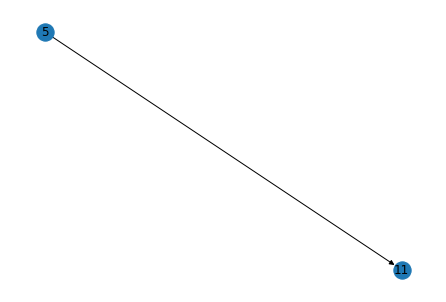

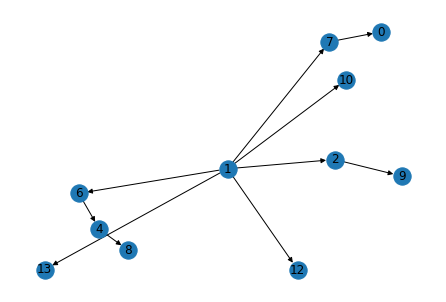

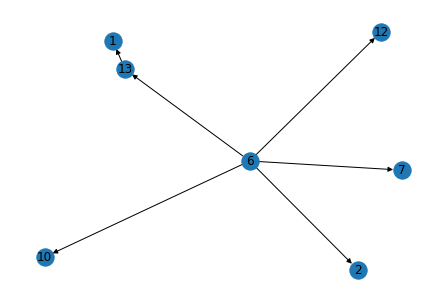

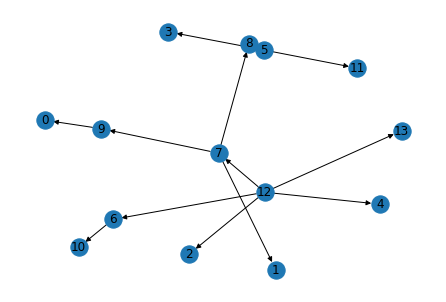

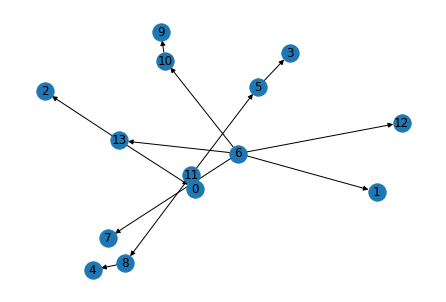

In [23]:
for graph in graphs[:5]:
    networkx.draw(graph, with_labels=True)
    plt.show()